In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('Dataset .csv')

In [3]:
df.shape

(9551, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.isna()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
# group by city and calculate avg cost

df.groupby("City")["Average Cost for two"].mean()

City
Abu Dhabi           182.000000
Agra               1065.000000
Ahmedabad           857.142857
Albany               19.750000
Allahabad           517.500000
                      ...     
Weirton              25.000000
Wellington City      71.250000
Winchester Bay       25.000000
Yorkton              25.000000
��stanbul            81.428571
Name: Average Cost for two, Length: 141, dtype: float64

In [11]:
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending = False)

City
Jakarta           308437.500000
Tangerang         250000.000000
Bogor             160000.000000
Bandung           150000.000000
Pasay City          3333.333333
                      ...      
Mc Millan             10.000000
Inverloch              7.000000
Lakes Entrance         7.000000
Dicky Beach            7.000000
Miller                 0.000000
Name: Average Cost for two, Length: 141, dtype: float64

In [12]:
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending=True)

City
Miller                 0.000000
Dicky Beach            7.000000
Inverloch              7.000000
Lakes Entrance         7.000000
Lakeview              10.000000
                      ...      
Pasay City          3333.333333
Bandung           150000.000000
Bogor             160000.000000
Tangerang         250000.000000
Jakarta           308437.500000
Name: Average Cost for two, Length: 141, dtype: float64

In [13]:
df.groupby("City")["Price range"].mean().sort_values(ascending = False)


City
Princeton           4.0
Inner City          4.0
Vineland Station    4.0
Johannesburg        4.0
Panchkula           4.0
                   ... 
Lakeview            1.0
Lakes Entrance      1.0
Inverloch           1.0
Fernley             1.0
Clatskanie          1.0
Name: Price range, Length: 141, dtype: float64

In [14]:
df[["City", "Price range"]].sort_values(by = "City", ascending = False)

,City,Price range
9550,��stanbul,2
9537,��stanbul,2
9544,��stanbul,2
9543,��stanbul,2
9542,��stanbul,3
...,...,...
567,Abu Dhabi,2
568,Abu Dhabi,3
573,Abu Dhabi,2
570,Abu Dhabi,4


In [15]:
df.groupby("City")["Price range"].mean().sort_values(ascending = True)

City
Dicky Beach         1.0
Lakeview            1.0
Mc Millan           1.0
Vernonia            1.0
Inverloch           1.0
                   ... 
Inner City          4.0
Vineland Station    4.0
Princeton           4.0
Paynesville         4.0
Panchkula           4.0
Name: Price range, Length: 141, dtype: float64

In [16]:
data = df.groupby("Cuisines")["Votes"].sum().reset_index()

In [17]:
data[data["Votes"]!=0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


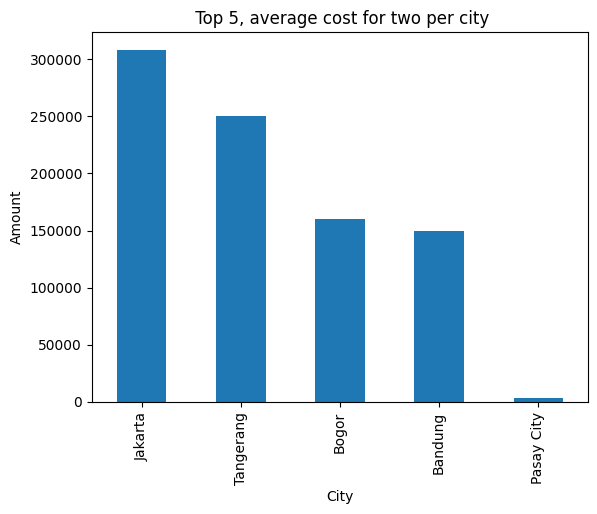

In [18]:
df.groupby("City")["Average Cost for two"].mean().sort_values(ascending = False).head().plot(kind="bar")
plt.title(" Top 5, average cost for two per city")
plt.xlabel("City")
plt.ylabel("Amount")
plt.show()


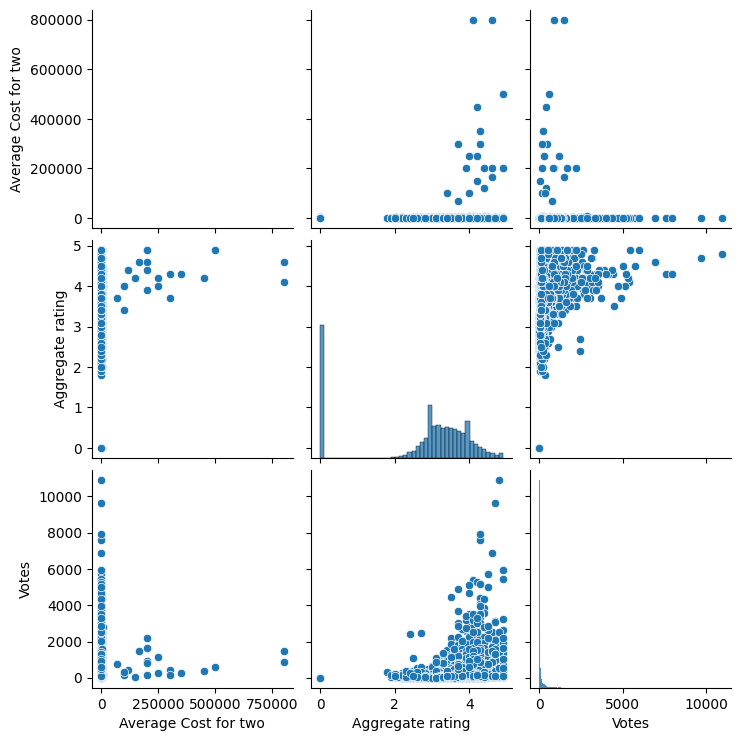

In [19]:
sns.pairplot(df[["Average Cost for two", "Aggregate rating", "Votes"]])

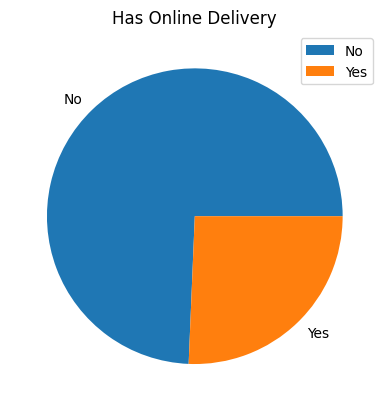

In [20]:
df["Has Online delivery"].value_counts().plot(kind="pie")
plt.title("Has Online Delivery")
plt.legend()
plt.ylabel("")
plt.show()

In [21]:
df[["Aggregate rating", "Rating text"]].head(8000)

,Aggregate rating,Rating text
0,4.8,Excellent
1,4.5,Excellent
2,4.4,Very Good
3,4.9,Excellent
4,4.8,Excellent
...,...,...
7995,3.3,Average
7996,3.1,Average
7997,3.3,Average
7998,3.1,Average


In [22]:
df = df[df["Rating text"] != "Not rated"]

In [23]:
df["Rating text"].value_counts()

Rating text
Average      3737
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

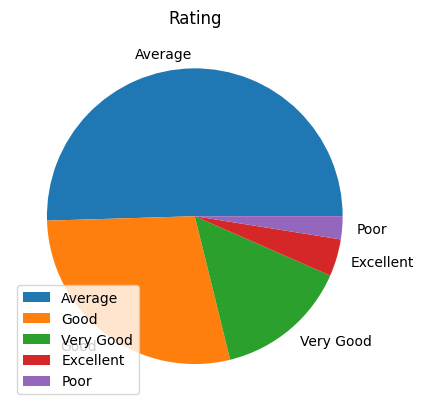

In [24]:
df["Rating text"].value_counts().plot(kind = "pie")
plt.title("Rating")
plt.ylabel("")
plt.legend()
plt.show()

In [25]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [26]:
x = df[['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range']]

In [27]:
x.head(3)

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4


In [28]:
y = df[['Aggregate rating']]
y.head(5)

,Aggregate rating
0,4.8
1,4.5
2,4.4
3,4.9
4,4.8


In [29]:
x["Price range"].value_counts()

Price range
1    2744
2    2711
3    1373
4     575
Name: count, dtype: int64

In [30]:
labelencoder = preprocessing.LabelEncoder()

In [31]:
# for table booking _ 0 = no and 1 = Yes

In [32]:
x['Has Online delivery'] = labelencoder.fit_transform(x['Has Online delivery'])

C:\Users\MSI Laptop\AppData\Local\Temp\ipykernel_12916\3901774887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Has Online delivery'] = labelencoder.fit_transform(x['Has Online delivery'])


In [33]:
x.head(3)

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,0,3
1,1200,Yes,0,3
2,4000,Yes,0,4


In [34]:
x['Has Table booking'] = labelencoder.fit_transform(x['Has Table booking'])

C:\Users\MSI Laptop\AppData\Local\Temp\ipykernel_12916\3155262264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Has Table booking'] = labelencoder.fit_transform(x['Has Table booking'])


In [35]:
x.head(4)

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4


In [36]:
labelencoder.classes_

array(['No', 'Yes'], dtype=object)

In [37]:
# Has table booking 0 is no 1 is yes
# Has online delivery 0 is no 1 is yes

In [38]:
scaler = preprocessing.StandardScaler()

In [39]:
x = scaler.fit_transform(x)
x

array([[-0.0190367 ,  2.37978283, -0.68302371,  1.10671644],
       [-0.0135729 ,  2.37978283, -0.68302371,  1.10671644],
       [ 0.13941344,  2.37978283, -0.68302371,  2.18135204],
       ...,
       [-0.06985002, -0.42020641, -0.68302371,  2.18135204],
       [-0.07258191, -0.42020641, -0.68302371,  2.18135204],
       [-0.07613338, -0.42020641, -0.68302371,  0.03208084]])

In [40]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [41]:
def  model_results(predictions):
  print("Mean absolute error : {}".format(mean_absolute_error(y_test, predictions)))
  print("RMS error :{}".format(np.sqrt(mean_squared_error(y_test, predictions))))

In [42]:
lr = LinearRegression()
lr

LinearRegression()

In [43]:
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
pred = lr.predict(x_test)
pred

array([[3.54036434],
       [3.16888336],
       [3.16908635],
       ...,
       [3.23054553],
       [3.43558613],
       [3.23047787]])

In [45]:
model_results(pred)

Mean absolute error : 0.4021160127020647
RMS error :0.5046680918106234


In [46]:
svr_model = SVR()
svr_model

SVR()

In [54]:
param_grid = {"C": [0.1,0.5],
              "kernel": ["linear","poly"],
              "degree":[2]
              }

In [61]:
svr_grid = GridSearchCV(svr_model, param_grid)
svr_grid


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [62]:
svr_grid.fit(x_train, y_train)



c:\Users\MSI Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MSI Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MSI Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\MSI Laptop\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\valid

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [63]:
grid_pred = svr_grid.predict(x_test)

In [64]:
model_results(grid_pred)

Mean absolute error : 0.40007628084573493
RMS error :0.508010485886788
